<a href="https://colab.research.google.com/github/varun-beep/DeepLearning/blob/main/XOR_Boolean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [3]:
model = Sequential([
    Dense(2, input_dim=2, activation='relu'),  # Hidden layer with 2 neurons and ReLU activation
    Dense(1, activation='sigmoid')            # Output layer with 1 neuron and sigmoid activation
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
model.fit(X, y, epochs=1000, verbose=0)  # Training for 1000 epochs with no verbose output

In [9]:
history = model.fit(X, y, epochs=1000, verbose=0)

In [6]:
predictions = model.predict(X)
print("Predictions:")
for i, pred in enumerate(predictions):
    print(f"Input: {X[i]}, Predicted Output: {round(pred[0], 2)}, Expected Output: {y[i][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Predictions:
Input: [0 0], Predicted Output: 0.009999999776482582, Expected Output: 0
Input: [0 1], Predicted Output: 1.0, Expected Output: 1
Input: [1 0], Predicted Output: 1.0, Expected Output: 1
Input: [1 1], Predicted Output: 0.009999999776482582, Expected Output: 0


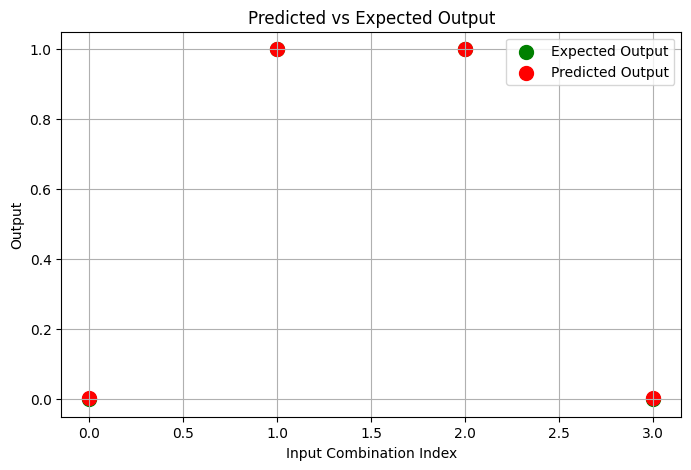

In [12]:
plt.figure(figsize=(8, 5))
predicted_outputs = predictions.flatten()  # Flatten predictions for visualization
plt.scatter(range(len(y)), y, label='Expected Output', color='green', s=100)
plt.scatter(range(len(predicted_outputs)), predicted_outputs, label='Predicted Output', color='red', s=100)
plt.title('Predicted vs Expected Output')
plt.xlabel('Input Combination Index')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
predictions = model.predict(X).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [18]:
table_data = {
    "Input 1": X[:, 0],
    "Input 2": X[:, 1],
    "Expected Output": y.flatten(),
    "Predicted Output": [round(p, 2) for p in predictions]  # Round predictions to 2 decimal places
}

df = pd.DataFrame(table_data)

# Print the table
print("Predicted Values Table:")
print(df)

Predicted Values Table:
   Input 1  Input 2  Expected Output  Predicted Output
0        0        0                0               0.0
1        0        1                1               1.0
2        1        0                1               1.0
3        1        1                0               0.0


In [21]:
# Print model weights
print("\nModel Weights:")
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"Layer: {layer.name}")
    print(f"Weights:\n{weights}")
    print(f"Biases:\n{biases}")

# Print learning rate
learning_rate = model.optimizer.learning_rate.numpy()
print(f"\nLearning Rate: {learning_rate}")


Model Weights:
Layer: dense
Weights:
[[ 2.7287366 -2.625472 ]
 [-2.7294366  2.624565 ]]
Biases:
[-1.7295068e-05  1.4449281e-05]
Layer: dense_1
Weights:
[[4.8664365]
 [5.151603 ]]
Biases:
[-5.8349223]

Learning Rate: 0.009999999776482582


In [20]:
# Extract weights and biases
layer_weights, layer_biases = model.layers[0].get_weights()  # Hidden layer
output_weights, output_biases = model.layers[1].get_weights()  # Output layer

# Convert weights and biases to string for display
hidden_weights_str = np.array2string(layer_weights, precision=2, separator=',')
hidden_biases_str = np.array2string(layer_biases, precision=2, separator=',')
output_weights_str = np.array2string(output_weights, precision=2, separator=',')
output_biases_str = np.array2string(output_biases, precision=2, separator=',')

# Learning rate
learning_rate = model.optimizer.learning_rate.numpy()

# Create a DataFrame for display
table_data = {
    "Input 1": X[:, 0],
    "Input 2": X[:, 1],
    "Expected Output": y.flatten(),
    "Predicted Output": [round(float(p), 2) for p in predictions],  # Convert to float before rounding
    "Hidden Weights": [hidden_weights_str] * len(X),
    "Hidden Biases": [hidden_biases_str] * len(X),
    "Output Weights": [output_weights_str] * len(X),
    "Output Biases": [output_biases_str] * len(X),
    "Learning Rate": [learning_rate] * len(X)
}

df = pd.DataFrame(table_data)

# Print the table
print("Predicted Values Table with Weights and Learning Rate:")
print(df)


Predicted Values Table with Weights and Learning Rate:
   Input 1  Input 2  Expected Output  Predicted Output  \
0        0        0                0               0.0   
1        0        1                1               1.0   
2        1        0                1               1.0   
3        1        1                0               0.0   

                     Hidden Weights          Hidden Biases  \
0  [[ 2.73,-2.63],\n [-2.73, 2.62]]  [-1.73e-05, 1.44e-05]   
1  [[ 2.73,-2.63],\n [-2.73, 2.62]]  [-1.73e-05, 1.44e-05]   
2  [[ 2.73,-2.63],\n [-2.73, 2.62]]  [-1.73e-05, 1.44e-05]   
3  [[ 2.73,-2.63],\n [-2.73, 2.62]]  [-1.73e-05, 1.44e-05]   

       Output Weights Output Biases  Learning Rate  
0  [[4.87],\n [5.15]]       [-5.83]           0.01  
1  [[4.87],\n [5.15]]       [-5.83]           0.01  
2  [[4.87],\n [5.15]]       [-5.83]           0.01  
3  [[4.87],\n [5.15]]       [-5.83]           0.01  
